In [131]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

### Recuperate data sources 
After recuperating data sources, we cleaned the second dataset. 

In [132]:
df = pd.read_excel('/Users/marius.fall/Downloads/DataPanelWHR2021C2.xls')
region = pd.read_csv('/Users/marius.fall/Downloads/ISO-3166-Countries-with-Regional-Codes-master/all/all.csv')
region_cleaned = region[['name','region','sub-region']]

###
Verify that the data displays correctly with .head() function

In [133]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


### Cleaning

We created a new dataframe that shows the column 'country name' as'name'. It is also another way to verify that we can modify the data. 

In [134]:
df_merged = pd.merge(left=df,right=region_cleaned, left_on='Country name',right_on='name', how='left').drop(['name'], axis=1)

In [135]:
df_merged= df_merged.rename(columns={"Country name":"name"})

In [136]:
df_merged['covid'] = np.where(df_merged.year == 2020, 1,0)

### Data Visualization 
After creating a new dataframe, we started our data visualizaton exercises.
We created the following visualizations to analyze data on a global scale: 
- heatmap
- scatterplot

<AxesSubplot:>

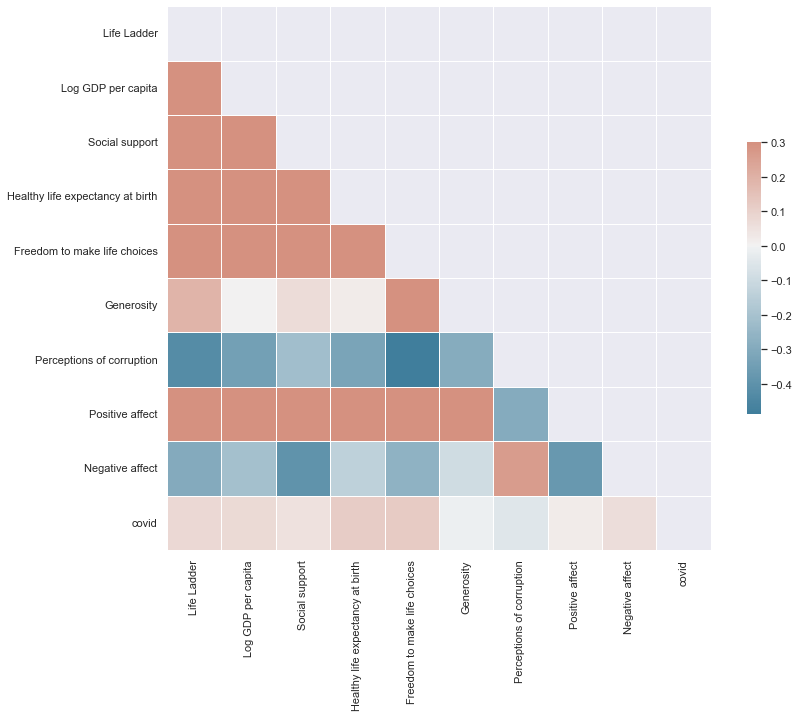

In [137]:
# your code here
corr = df_merged.drop(['year'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Variable Explanation

As mentioned in the README document, the calculations for happiness is based on the Life Ladder which is the result from the Annual Gallop Poll . In addition, the remaining 6 factors - levels of GDP, life expectancy, generosity, social support, freedom, and corruption - are  averaged calculations from 2018-2020 that show what share of these factors determine why why one's country total score is higher than another.

You'll find definitions of the variables below:

| ** Factors**|** Score and Description **|
|-----|-----|
| Life Ladder|Cantril Ladder results from annual Gallup Poll, 0-10 |
| GDP Per Capita|Calculation of strength of GDP in relation to Dystopia, 0-10 |
| Social support | Calculation of feeling of community among other population members, 0-1 |
| Life Expectancy|Calculation of Life Expectancy vs Coefficient of Average Coefficient |
| Freedom to make life choices| Calculation of relative social freedom, 0-1 |
| Perceptions of corruption| Calculation of interpretation of corrpution, 0-1 |
| Positive Affect|measured from 0-1 |
| Negative Affect| measured from 0 -1 |
| Region|Location of countries by continent |
| Sub-region| classification of countries by the regions they are found in their respective continents |
    

#### Checks: Make sure that the data that we are using is viable. 

In [138]:
unique_countries = df_merged['name'].nunique()

In [139]:
unique_countries

166

In [ ]:
#Creation of list so that our data only shows certain years

In [152]:
lst = [2014+i for i in range(0,6)]

In [151]:
lst

[2014, 2015, 2016, 2017, 2018]

In [145]:
df_1420 = df_merged[df_merged.year.isin(lst)]

#### Verification of ratio of data missing

The lower the ratio , the more reliable the data. 

In [149]:
lst = [2014+i for i in range(0,6)]
df_1420 = df_merged[df_merged.year.isin(lst)]
check_ratio = {i:round((df_1420[df_1420.year == i]['name'].nunique()/unique_countries)*100-100,2) for i in lst}
print(check_ratio)

{2014: -12.65, 2015: -13.86, 2016: -14.46, 2017: -11.45, 2018: -14.46, 2019: -13.25, 2020: -42.77}


In [13]:
# We see that we have less than 15% of discrepancy regarding the total number of countries : the quality is good enough to work with it

In [19]:
region_vision = df_merged.groupby(['name','region','sub-region']).mean().reset_index()[['name','region','sub-region','Life Ladder', 'Log GDP per capita']]

In [20]:
region_vision.head()

,name,region,sub-region,Life Ladder,Log GDP per capita
0,Afghanistan,Asia,Southern Asia,3.594628,7.650843
1,Albania,Europe,Southern Europe,5.019427,9.384397
2,Algeria,Africa,Northern Africa,5.389717,9.328897
3,Angola,Africa,Sub-Saharan Africa,4.420299,8.989725
4,Argentina,Americas,Latin America and the Caribbean,6.310166,10.033868


<AxesSubplot:xlabel='Log GDP per capita', ylabel='Life Ladder'>

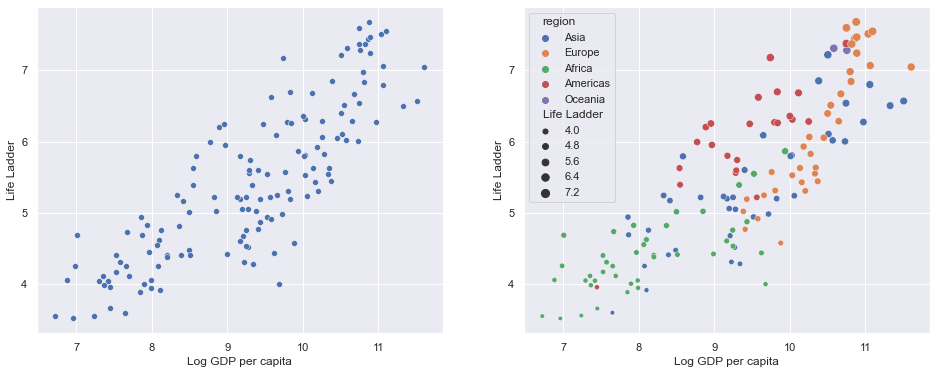

In [123]:
#Scatter plot to check the distribution by country and region
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,6))
sns.scatterplot(data=region_vision, x="Log GDP per capita", y='Life Ladder', ax=axes[0])
sns.scatterplot(data=region_vision, x="Log GDP per capita", y='Life Ladder', hue='region', size='Life Ladder', ax=axes[1])

In [7]:
# We see can see in the scatter plot that in general a higher GDP
# is a determinant for a higher life ladder score. 

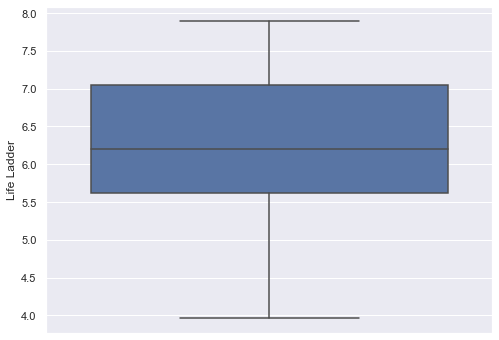

In [153]:
# Let's check Europe region and break it down by subregion
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(y=df_1420[df_1420.region == 'Europe']['Life Ladder'])


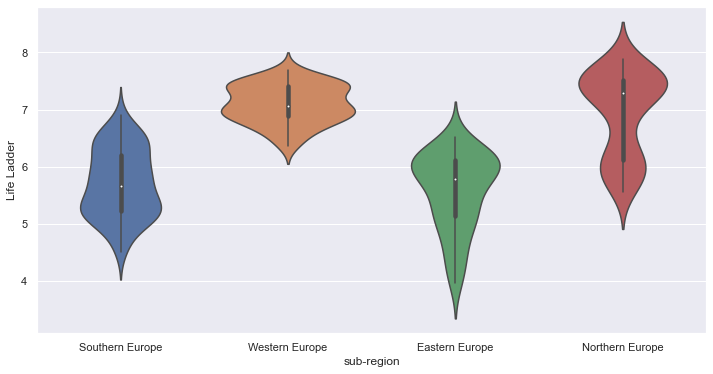

In [154]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.violinplot(data=df_1419[df_1419.region == 'Europe'], x="sub-region", y='Life Ladder')

In [9]:
# Using a violin plot visualisation : we can observe that 
# Western Europe tends to be happier but they do not have a 
# clear advantage over other regions in Europe

In [ ]:
# Let's check the a specific country in Western Europe over the last 6 years (2020 included) : France 

In [68]:
lst.append(2020)

In [69]:
lst

[2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [71]:
df_merged[(df_merged.name == 'France') & (df_merged.year.isin(lst))]

,name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,sub-region
572,France,2014,6.466868,10.674232,0.877505,73.000000,0.803474,-0.118097,0.655637,0.811054,0.215894,Europe,Western Europe
573,France,2015,6.357625,10.681743,0.895719,73.199997,0.817036,-0.139271,0.640602,0.785966,0.215400,Europe,Western Europe
574,France,2016,6.475209,10.690000,0.884923,73.400002,0.786780,-0.091287,0.622697,0.772661,0.270036,Europe,Western Europe
575,France,2017,6.635222,10.710555,0.931495,73.599998,0.833890,-0.123433,0.601486,0.762098,0.241984,Europe,Western Europe
576,France,2018,6.665904,10.726808,0.921463,73.800003,0.816377,-0.137875,0.581775,0.767313,0.282451,Europe,Western Europe
577,France,2019,6.689644,10.740378,0.958348,74.000000,0.827241,-0.133166,0.568272,0.735155,0.250416,Europe,Western Europe
578,France,2020,6.714112,10.643280,0.947354,74.199997,0.823386,-0.168961,0.564641,0.731814,0.230950,Europe,Western Europe


In [74]:
#French people seems to be happier than ever :
    #even if they earn less money (Log GDP per capita) they declare to be happier
    #they had a good social support, better freedom to make life choice but were less generous this year

In [77]:
df_france = df_merged[(df_merged.name == 'France') & (df_merged.year.isin(lst))]

In [79]:
df_france_cleaned = df_france.loc[0:,'year':'Negative affect']

In [87]:
columns_to_use  = list(df_france_cleaned.columns)

In [89]:
columns_to_use.pop(0)

'year'

TypeError: 'list' object is not callable

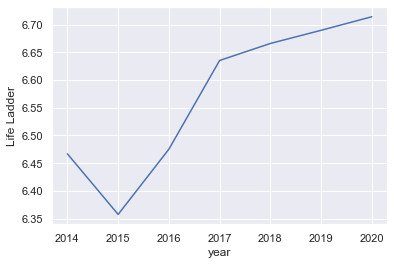

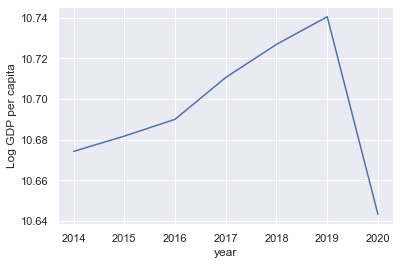

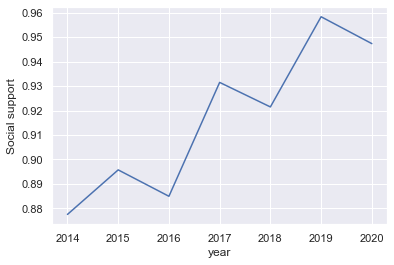

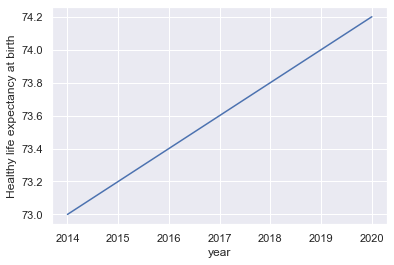

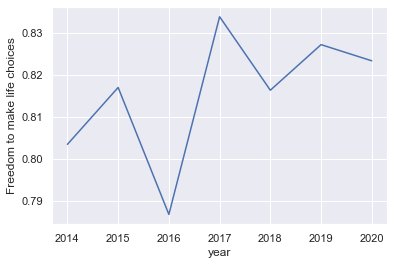

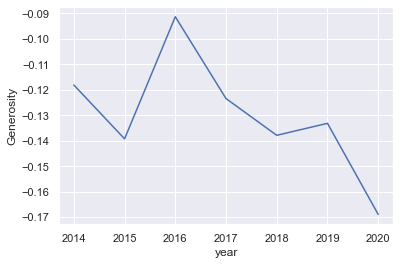

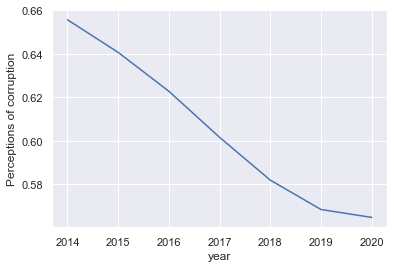

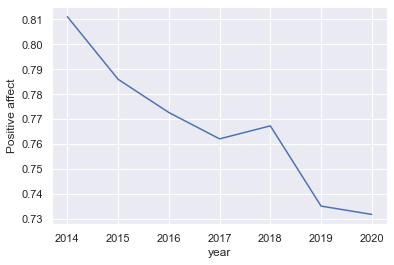

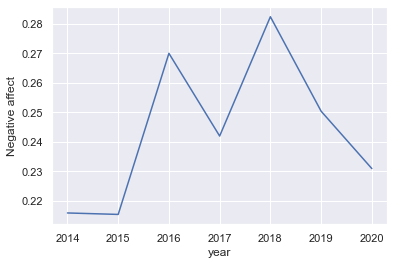

In [124]:
for col in columns_to_use:
    sns.lineplot(data=df_france_cleaned, x="year", y=col)
    plt.show()

In [10]:
# We see that France while happier than ever, 
# has indicators that are decreasing. Therefore, measuring happiness
# is not an exact science and other not cited factors could be at play.